# pandas 기초 (2)

* 싸이그래머 : 생물심리Py
* 발표자 : 김무성    

# 차례

* 추천 사이트
* pandas로 데이터 다루기

# 추천 사이트

* 통계 기초 ppt : Basic statistics: a survival guide - https://education.med.imperial.ac.uk/ext/intercalate11-12/statistics.ppt

# pandas로 데이터 다루기

* 기본 연산, 함수, 정렬, 중복색인
* 기본 자료 특성 탐색 
* 누락값 처리
* 계층적 색인
* 로우 색인과 컬럼 색인 교환
* Panel 데이터
* 데이터 입출력
* 데이터 다듬기
* 데이터 그룹 연산

## 기본 연산, 함수, 정렬, 중복 색인

* 산술연산
* 함수 적용과 매핑
* 데이터 정렬, 순위
* 중복 색인

### 산술연산

* pandas에서 중요한 기능은 색인이 다른 객체 간의 산술연산이다. 
* 객체를 더할 때 짝이 맞지 않는 색인이 있다면 결과에 두 색인이 통합된다

In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [4]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [5]:
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [7]:
# 더하기. 겹치는 색인이 없다면 데이터는 NA 값이 됨. 
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [10]:
# DataFrame은 로우와 컬럼 모두에 전파됨
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [11]:
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [12]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3,NaN,6,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9,NaN,12,NaN
Utah,NaN,NaN,NaN,NaN


In [15]:
# DataFrame과 Series 간의 연산
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [17]:
series = frame.ix[0]
series

b    0
d    1
e    2
Name: Utah, dtype: float64

In [20]:
# 기본적으로 DataFrame 과 Series 간의 산술연산은 
# Series의 색인을 DataFrame의 칼럼에 맞추고 아래 로우로 전파
# 즉 broadcasting
frame - series

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Oregon,9,9,9


In [21]:
# 만약 색인 값을 DataFrame의 칼럼이나 Series의 색인에서 찾을 수 없다면 
# 그 객체는 형식을 맞추기 위해 재색인
series2 = Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [22]:
frame + series2

,b,d,e,f
Utah,0,NaN,3,NaN
Ohio,3,NaN,6,NaN
Texas,6,NaN,9,NaN
Oregon,9,NaN,12,NaN


### 함수 적용과 매핑

In [23]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,1.230536,0.954398,0.779991
Ohio,0.786592,-0.289047,0.694158
Texas,0.374949,0.655600,0.573002
Oregon,-1.460670,-1.101064,-0.326258


In [24]:
# NumPy의 유니버셜 함수(배열의 각 원소에 적용되는 메서드) 적용 가능
np.abs(frame)

,b,d,e
Utah,1.230536,0.954398,0.779991
Ohio,0.786592,0.289047,0.694158
Texas,0.374949,0.655600,0.573002
Oregon,1.460670,1.101064,0.326258


In [28]:
# apply를 통해 각 로우나 칼럼의 1차원 배열에 함수를 적용
f = lambda x: x.max() - x.min()

frame.apply(f)

b    2.691205
d    2.055462
e    1.106249
dtype: float64

In [26]:
frame.apply(f, axis=1)

Utah      0.450544
Ohio      1.075639
Texas     0.280651
Oregon    1.134412
dtype: float64

In [29]:
# apply 메서드에 전달된 함수는 스칼라 값을 반환할 필요 없으며, 
# Series 또는 여러 값을 반환해도 된다.
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)

,b,d,e
min,-1.460670,-1.101064,-0.326258
max,1.230536,0.954398,0.779991


In [30]:
# 각 원소에 함수가 적용되게 하고 싶으면 applymap
format = lambda x: '%.2f' % x

frame.applymap(format)

,b,d,e
Utah,1.23,0.95,0.78
Ohio,0.79,-0.29,0.69
Texas,0.37,0.66,0.57
Oregon,-1.46,-1.10,-0.33


### 데이터 정렬, 순위

* 색인을 기준으로 정렬
* 값을 기준으로 정렬
* 특정 로우나 컬럼만 정렬

#### 색인을 기준으로 정렬

In [31]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [32]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [33]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [34]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [35]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [36]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


#### 값을 기준으로 정렬

In [37]:
obj = Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [38]:
obj.order()

2   -3
3    2
0    4
1    7
dtype: int64

In [39]:
# 정렬시 NaN은 가장 마지막에 위치
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj

0     4
1   NaN
2     7
3   NaN
4    -3
5     2
dtype: float64

In [40]:
obj.order()

4    -3
5     2
0     4
2     7
1   NaN
3   NaN
dtype: float64

#### 특정 로우나 컬럼만 정렬

In [41]:
frame = DataFrame({'b': [4, 7, -3, 2],
                   'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [42]:
frame.sort_index(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [43]:
# 여러 개의 컬럼 정렬
frame2 = DataFrame({'b': [4, 7, -3, 2],
                   'a': [0, 1, 0, 1],
                   'c': [1, -2, 0, 1]})
frame2

,a,b,c
0,0,4,1
1,1,7,-2
2,0,-3,0
3,1,2,1


In [45]:
frame2.sort_index(by=['a', 'c'])

,a,b,c
2,0,-3,0
0,0,4,1
1,1,7,-2
3,1,2,1


## 기본 자료 특성 탐색

* 자료특성 요약
* 상관관계와 공분산
* 유일 값, 카운트, 멤버십

### 자료특성 요약

In [19]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [20]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [21]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [22]:
df.sum(axis=1)

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

In [23]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [24]:
df.idxmax()

one    b
two    d
dtype: object

In [27]:
# 수치 데이터가 아니면 빈도 관련 기술요약치를 반환
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [26]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### 상관관계와 공분산

In [36]:
# 주식 데이터 가져오기
import pandas.io.data as web

all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT']:
    all_data[ticker] = web.get_data_yahoo(ticker, '1/1/2000', '1/1/2010')

In [41]:
price = DataFrame({tic: data['Adj Close']
                   for tic, data in all_data.iteritems()})
price.head()

,AAPL,IBM,MSFT
Date,,,
2000-01-03,3.77,94.16,41.47
2000-01-04,3.45,90.97,40.07
2000-01-05,3.50,94.16,40.49
2000-01-06,3.20,92.54,39.14
2000-01-07,3.35,92.13,39.65


In [42]:
volume = DataFrame({tic: data['Volume']
                    for tic, data in all_data.iteritems()})
volume.head()

,AAPL,IBM,MSFT
Date,,,
2000-01-03,133949200,10347700,53228400
2000-01-04,128094400,8227800,54119000
2000-01-05,194580400,12733200,64059600
2000-01-06,191993200,7971900,54976600
2000-01-07,115183600,11856700,62013600


In [43]:
# 각 주식의 퍼센트 변화율
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT
Date,,,
2009-12-24,0.034521,0.004432,0.002600
2009-12-28,0.012070,0.013323,0.005187
2009-12-29,-0.011575,-0.003517,0.007372
2009-12-30,0.012065,0.005463,-0.013904
2009-12-31,-0.004208,-0.012621,-0.015584


In [46]:
import matplotlib.pyplot as plt

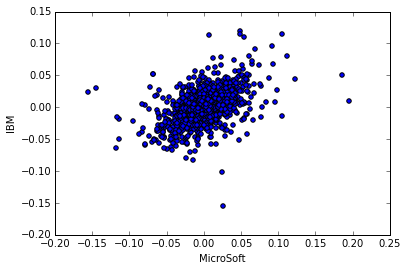

In [53]:
# MS와 IBM의 산포도
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(returns.MSFT, returns.IBM)
ax.set_xlabel('MicroSoft')
ax.set_ylabel('IBM')

In [44]:
# MicroSoft와 IBM의 주식 퍼센트 변화율의 상관관계 구하기
returns.MSFT.corr(returns.IBM)

0.49608477623932762

In [45]:
# 공분산
returns.MSFT.cov(returns.IBM)

0.00021609902459138997

In [54]:
returns.corr()

,AAPL,IBM,MSFT
AAPL,1.000000,0.409605,0.423189
IBM,0.409605,1.000000,0.496085
MSFT,0.423189,0.496085,1.000000


In [55]:
returns.cov()

,AAPL,IBM,MSFT
AAPL,0.001032,0.000252,0.000309
IBM,0.000252,0.000367,0.000216
MSFT,0.000309,0.000216,0.000517


In [56]:
returns.corrwith(returns.IBM)

AAPL    0.409605
IBM     1.000000
MSFT    0.496085
dtype: float64

In [58]:
volume.head()

,AAPL,IBM,MSFT
Date,,,
2000-01-03,133949200,10347700,53228400
2000-01-04,128094400,8227800,54119000
2000-01-05,194580400,12733200,64059600
2000-01-06,191993200,7971900,54976600
2000-01-07,115183600,11856700,62013600


In [61]:
# 시가총액과 주식 퍼센트 변화율간의 상관관계
# DataFrame을 넘기면 맞아떨어지는 이름의 칼럼의 이름에 대한 상관관계를 계산
returns.corrwith(volume)

AAPL   -0.057955
IBM    -0.007892
MSFT   -0.014295
dtype: float64

### 유일 값, 카운트, 멤버십

In [62]:
# 유일 값
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [63]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [64]:
# 카운트
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [66]:
pd.value_counts(obj.values, sort=True)

c    3
a    3
b    2
d    1
dtype: int64

In [67]:
# 멤버십
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [68]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

## 누락값 처리

* 누락값 찾기 : isnull
* 누락값 제거 : dropna
* 누락값 채우기 : fillna

### 누락값 찾기 : isnull

* pandas는 누락된 데이터를 실수든 아니든 모두 NaN으로 취급

In [69]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [70]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [71]:
string_data[0] = None
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [72]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

### 누락값 제거 : dropna

In [73]:
from numpy import nan as NA

data = Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [74]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [77]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 9, 2]])
data

,0,1,2
0,1,6.5,3
1,1,NaN,NaN
2,NaN,NaN,NaN
3,NaN,9.0,2


In [78]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1,6.5,3


In [79]:
# 모든 값이 NA인 로우만 제외
data.dropna(how='all')

,0,1,2
0,1,6.5,3
1,1,NaN,NaN
3,NaN,9.0,2


In [80]:
# 몇개 이상 값이 들어있는가를 기준으로
data.dropna(thresh=2)

,0,1,2
0,1,6.5,3
3,NaN,9.0,2


### 누락값 채우기 : fillna

In [83]:
df = DataFrame(np.random.randn(7, 3))
df.ix[:4, 1] = NA; df.ix[:2, 2] = NA
df

,0,1,2
0,-0.864298,NaN,NaN
1,-0.056151,NaN,NaN
2,0.226936,NaN,NaN
3,1.825479,NaN,0.528780
4,-0.040804,NaN,-0.996493
5,1.586317,-0.004980,-0.039019
6,-0.311639,-2.297522,-0.975941


In [84]:
df.fillna(0)

,0,1,2
0,-0.864298,0.000000,0.000000
1,-0.056151,0.000000,0.000000
2,0.226936,0.000000,0.000000
3,1.825479,0.000000,0.528780
4,-0.040804,0.000000,-0.996493
5,1.586317,-0.004980,-0.039019
6,-0.311639,-2.297522,-0.975941


In [86]:
# key는 컬럼 색인을 뜻함
df.fillna({1: 0.5, 3: -1})

,0,1,2
0,-0.864298,0.500000,NaN
1,-0.056151,0.500000,NaN
2,0.226936,0.500000,NaN
3,1.825479,0.500000,0.528780
4,-0.040804,0.500000,-0.996493
5,1.586317,-0.004980,-0.039019
6,-0.311639,-2.297522,-0.975941


In [87]:
# 보간법 가능
df = DataFrame(np.random.randn(6, 3))
df.ix[2:, 1] = NA; df.ix[4:, 2] = NA
df

,0,1,2
0,1.070430,0.929998,1.464021
1,0.834314,0.040356,-0.028218
2,-1.251520,NaN,0.568477
3,-0.546254,NaN,-0.464190
4,-0.729633,NaN,NaN
5,-1.925968,NaN,NaN


In [88]:
df.fillna(method='ffill')

,0,1,2
0,1.070430,0.929998,1.464021
1,0.834314,0.040356,-0.028218
2,-1.251520,0.040356,0.568477
3,-0.546254,0.040356,-0.464190
4,-0.729633,0.040356,-0.464190
5,-1.925968,0.040356,-0.464190


In [91]:
# 함수도 넘길 수 있다.
df.fillna(df.mean(0))

,0,1,2
0,1.070430,0.929998,1.464021
1,0.834314,0.040356,-0.028218
2,-1.251520,0.485177,0.568477
3,-0.546254,0.485177,-0.464190
4,-0.729633,0.485177,0.385023
5,-1.925968,0.485177,0.385023


## 계층적 색인

In [92]:
data = Series(np.random.randn(10),
              index = [['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                       [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

a  1    0.299331
   2   -2.320418
   3   -1.333153
b  1    0.757166
   2   -1.473082
   3   -0.300510
c  1    0.986354
   2    1.393783
d  2   -1.309509
   3   -0.417365
dtype: float64

In [93]:
data.index

MultiIndex(levels=[[u'a', u'b', u'c', u'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [94]:
data['b']

1    0.757166
2   -1.473082
3   -0.300510
dtype: float64

In [95]:
data['b':'c']

b  1    0.757166
   2   -1.473082
   3   -0.300510
c  1    0.986354
   2    1.393783
dtype: float64

In [96]:
# 계층 색인 풀기 - wide 형
data.unstack()

,1,2,3
a,0.299331,-2.320418,-1.333153
b,0.757166,-1.473082,-0.300510
c,0.986354,1.393783,NaN
d,NaN,-1.309509,-0.417365


In [97]:
# 데이터프레임 로우,칼럼 색인을 계층 색인으로 묶어내기 - long 형
data.unstack().stack()

a  1    0.299331
   2   -2.320418
   3   -1.333153
b  1    0.757166
   2   -1.473082
   3   -0.300510
c  1    0.986354
   2    1.393783
d  2   -1.309509
   3   -0.417365
dtype: float64

In [98]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [100]:
# 계층 색인에 이름 주기
frame.index.names = ['key1', 'key2']
frame

Ohio     Colorado
          Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [101]:
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [104]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [105]:
frame['Ohio'].ix['a']

color,Green,Red
key2,,
1,0,1
2,3,4


In [106]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [107]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 로우 색인과 컬럼 색인 교환

In [108]:
frame = DataFrame({'a': range(7),
                   'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [110]:
#컬럼 색인을 로우 색인으로 옮길 수 있다.
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [113]:
#로우 색인 -> 컬럼 색인으로
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 데이터 입출력

* 파일 읽기
* 파일 쓰기
* 웹 내용 긁어오기
* 데이터베이스 사용

### 파일 읽기

함수 | 설명 |
---------- | ----------|
read_csv | 파일, URL 또는 파일과 유사한 객체로부터 구분된 데이터 읽어옴. 구분자는 쉼표(,)를 기본으로.
read_table | read_csv와 유사. 구분자는 탭('\t')을 기본으로.
read_fwf | 고정폭 컬럼 형식에서 읽어옴(구분자 없는 경우)
read_clipboard | 클립보드에 있는 데이터를 읽어오는 read_table 함수. 웹페이지에서 표를 긁어올 때 유용

In [152]:
from pandas import DataFrame, Series
import pandas as pd

In [157]:
!cat ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [159]:
df = pd.read_csv('ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [160]:
pd.read_table('ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [161]:
pd.read_csv('ex1.csv', header=None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [164]:
pd.read_csv('ex1.csv', header=None, names=['d', 'e', 'f', 'message2'])

,d,e,f,message2
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [165]:
# 몇 줄만 읽어오기
pd.read_csv('ex1.csv', nrows=2)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world


In [171]:
# 로우 단위로, 여러 조각으로 읽어오기
chunker = pd.read_csv('ex6.csv', chunksize=1000)
chunker

In [170]:
!wc -l ex6.csv

10001 03_data/file/ex6.csv


In [169]:
!head ex6.csv

one,two,three,four,key
0.467976300189,-0.0386485396255,-0.295344251987,-1.82472622729,L
-0.358893469543,1.40445260007,0.704964644926,-0.200638304015,B
-0.50184039929,0.659253707223,-0.421690619312,-0.0576883018364,G
0.204886212202,1.07413396504,1.38836131252,-0.982404023494,R
0.354627914484,-0.133115852296,0.283762637978,-0.837062961653,Q
1.81748001608,0.742272722638,0.419394843928,-2.25103520513,Q
-0.776764319165,0.935517747061,-0.332871759623,-1.87564085416,U
-0.913134961617,1.53062351168,-0.572656719239,0.477252252981,K
0.358479538224,-0.49757199147,-0.367016188009,0.507701778685,S


In [172]:
# chunker로 쪼개진 파일을 순회하면서, key 칼럼에 있는 값 세어보기
tot = Series([])
for piece in chunker :
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
    
tot = tot.order(ascending=False)
tot

E    368
X    364
L    346
O    343
Q    340
M    338
J    337
F    335
K    334
H    330
V    328
I    327
U    326
P    324
D    320
A    320
R    318
Y    314
G    308
S    308
N    306
W    305
T    304
B    302
Z    288
C    286
4    171
6    166
7    164
8    162
3    162
5    157
2    152
0    151
9    150
1    146
dtype: float64

In [173]:
piece.head()

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,B
1,-0.358893,1.404453,0.704965,-0.200638,M
2,-0.501840,0.659254,-0.421691,-0.057688,N
3,0.204886,1.074134,1.388361,-0.982404,N
4,0.354628,-0.133116,0.283763,-0.837063,Y


In [176]:
piece['key'].value_counts()

K    42
M    41
U    39
Y    38
P    38
E    35
R    34
Q    34
I    33
B    33
T    33
F    33
H    33
A    32
G    31
Z    31
L    30
J    29
N    29
S    29
X    28
W    28
C    28
3    26
D    25
V    23
6    22
4    21
O    19
0    17
2    15
8    15
5    15
9    15
7    14
1    12
dtype: int64

### 파일 쓰기

In [178]:
data = pd.read_csv('ex1.csv')
data

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [179]:
# 쓰기
data.to_csv('out.csv')

In [180]:
!cat out.csv

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [181]:
# 다른 구분자 사용
data.to_csv('out2.csv', sep='|')

In [183]:
!cat out2.csv

|a|b|c|d|message
0|1|2|3|4|hello
1|5|6|7|8|world
2|9|10|11|12|foo


In [185]:
# 컬럼의 일부분반 저장
data.to_csv('out3.csv', columns=['a', 'b', 'd'])

In [186]:
!cat out3.csv

,a,b,d
0,1,2,4
1,5,6,8
2,9,10,12


### 웹 내용 긁어오기

* json 데이터 다루기
* 웹 API

#### json 데이터 다루기

In [191]:
# JSON 데이터
obj = """
{
    "name": "Wes",
    "places_lived": ["United States", "Spain", "Germany"],
    "pet": null, "siblings": [{"name": "Scott", "age":25, "pet":"Zuko"},
                                {"name": "Katie", "age":33, "pet": "Cisco"}]
}
"""

In [192]:
import json
result = json.loads(obj)
result

{u'name': u'Wes',
 u'pet': None,
 u'places_lived': [u'United States', u'Spain', u'Germany'],
 u'siblings': [{u'age': 25, u'name': u'Scott', u'pet': u'Zuko'},
  {u'age': 33, u'name': u'Katie', u'pet': u'Cisco'}]}

In [195]:
# JSON 객체의 리스트를 DataFrame 생성자로 넘기고 데이터 필드 선택 가능
siblings = DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,25
1,Katie,33


#### 웹 API

In [209]:
import requests

url = 'http://www.burgerking.co.kr/api/store/searchmap/empty/?areacd='
resp = requests.get(url)
resp

<Response [200]>

In [233]:
import json
data = json.loads(resp.text)

In [237]:
data[:3]

[{u'AllHour': u'N',
  u'CloseCleaning': u'',
  u'ClosePeakSeason': u'',
  u'CloseWeekday': u'22:00',
  u'Delivery': u'N',
  u'DriveThrough': u'N',
  u'Morning': u'N',
  u'NewAddr': u'\uc11c\uc6b8\ud2b9\ubcc4\uc2dc \uae08\ucc9c\uad6c \uac00\uc0b0\ub514\uc9c0\ud1381\ub85c ',
  u'NewAddr2': u'168 \uc6b0\ub9bc\ub77c\uc774\uc628\uc2a4\ubc38\ub9ac A\ub3d9',
  u'OpenTime': u'9:00',
  u'PhoneNumber': u'02-853-0332',
  u'PointX': 37.4799652,
  u'PointY': 126.882637,
  u'StoreNM': u'\uac00\uc0b0\ub514\uc9c0\ud138\uc810',
  u'StoreSQ': 1},
 {u'AllHour': u'N',
  u'CloseCleaning': u'',
  u'ClosePeakSeason': u'/ \uae08, \ud1a0: 11:00~24:00',
  u'CloseWeekday': u'22:30',
  u'Delivery': u'N',
  u'DriveThrough': u'N',
  u'Morning': u'N',
  u'NewAddr': u'\uc11c\uc6b8\ud2b9\ubcc4\uc2dc \uae08\ucc9c\uad6c \ub514\uc9c0\ud138\ub85c ',
  u'NewAddr2': u'10\uae38 9 \ud604\ub300\uc544\uc6b8\ub81b 6\uce35',
  u'OpenTime': u'11:00',
  u'PhoneNumber': u'02-2136-9962',
  u'PointX': 37.47762,
  u'PointY': 126.889053

In [238]:
data[0].keys()

[u'Delivery',
 u'OpenTime',
 u'ClosePeakSeason',
 u'NewAddr',
 u'CloseWeekday',
 u'StoreNM',
 u'DriveThrough',
 u'Morning',
 u'StoreSQ',
 u'AllHour',
 u'PhoneNumber',
 u'NewAddr2',
 u'PointX',
 u'PointY',
 u'CloseCleaning']

In [229]:
fields = ['StoreNM', 'Delivery', 'OpenTime', 'PointX', 'PointY']
burger_store = DataFrame(data, columns=fields)

In [230]:
burger_store.head()

,StoreNM,Delivery,OpenTime,PointX,PointY
0,가산디지털점,N,9:00,37.479965,126.882637
1,가산현대아울렛점,N,11:00,37.477620,126.889053
2,가양이마트점,N,10:00,37.558193,126.861816
3,강남NC점,N,,37.509400,127.007309
4,강남교보점,N,,37.504570,127.023590


## 데이터 다듬기

* 데이터 합치기 
* 재형성과 피벗
* 데이터 변형
    

### 데이터 합치기

* merge
* concat
* combine_first

#### merge

* 하나 이상의 키를 기준으로 DataFrame의 로우를 합친다. SQL이나 다른 관계형 데이터베이스의 join 연산과 비슷하다.
* 기본적으로 내부조인inner join을 수행하여 교집합을 반환한다.
* how 인자로 왼쪽 우선 외부조인(left), 오른쪽 우선 외부조인(right), 완전 외부조인(outer)를 수행할 수 있다. 
* 색인도 merge key가 될 수 있다.

##### 내부조인inner join

In [259]:
df1 = DataFrame({'key' : ['b','b','a','c','a','a','b'],
                'data1': range(7)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [260]:
df2 = DataFrame({'key' : ['a','b','d'],
                'data2': range(3)})
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [252]:
# 암묵적으로 겹치는 컬럼을 키로 사용해서 합침
pd.merge(df1,df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [253]:
# 명시적으로 키를 설정할 수 있다.
pd.merge(df1,df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [256]:
# 공통되는 칼럼이 없드면 정해줄수 있다.

df3 = DataFrame({'lkey' : ['b','b','a','c','a','a','b'],
                'data1': range(7)})
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [257]:
df4 = DataFrame({'rkey' : ['a','b','d'],
                'data2': range(3)})
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [258]:
# 따로 정해줌
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


##### 완전 외부조인(outer)

In [261]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [262]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [263]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,NaN
7,NaN,d,2


##### 왼쪽 우선 외부조인(left)

In [264]:
df1 = DataFrame({'key' : ['b','b','a','c','a','b'],
                'data1': range(6)})
df2 = DataFrame({'key' : ['a','b','a', 'b', 'd'],
                'data2': range(5)})

In [266]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [267]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [268]:
# 왼쪽 우선 외부조인은 왼쪽의 모든 로우를 포함하는 결과를 반환한다
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,2,a,0
5,2,a,2
6,3,c,NaN
7,4,a,0
8,4,a,2
9,5,b,1


##### 오른쪽 우선 외부조인(right)

In [269]:
# 오른쪽 우선 외부조인은 오른쪽의 모든 로우를 포함하는 결과를 반환한다
pd.merge(df1, df2, on='key', how='right')

,data1,key,data2
0,0,b,1
1,1,b,1
2,5,b,1
3,0,b,3
4,1,b,3
5,5,b,3
6,2,a,0
7,4,a,0
8,2,a,2
9,4,a,2


##### 색인 merge

In [273]:
left1 = DataFrame({'key' : ['a', 'b', 'a', 'a', 'b', 'c'],
                           'value' : range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [274]:
right1 = DataFrame({'group_val' : [3.5, 7]}, index=['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [275]:
# 기본은 교집합
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [276]:
#  외부조인
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


#### concat

하나의 축을 따라 객체를 이어붙인다.

* numpy
  - concatenate 함수
* pandas
  * concat 함수
      * Series
      * DataFrame
      * axis 인자
      * join_axes 인자
      * keys 인자
      * ignore_index 인자

In [279]:
# numpy의 concatenate 함수
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [280]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [284]:
# pandas의 concatenate 함수

# Series 객체
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [283]:
s1

a    0
b    1
dtype: int64

In [286]:
s2

c    2
d    3
e    4
dtype: int64

In [287]:
s3

f    5
g    6
dtype: int64

In [288]:
# 합치기
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [282]:
# 축 바꿔서
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [290]:
s4 = pd.concat([s1*5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [291]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0,0
c,NaN,NaN
b,1,5
e,NaN,NaN


In [292]:
# DataFrame도 비슷하게 작동한다

df1 = DataFrame(np.arange(6).reshape(3, 2), index = ['a', 'b', 'c'],
                        columns = ['one', 'two'])

df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index = ['a',  'c'],
                        columns = ['three', 'four'])

In [293]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [294]:
df2

,three,four
a,5,6
c,7,8


In [295]:
pd.concat([df1, df2])

,four,one,three,two
a,NaN,0,NaN,1
b,NaN,2,NaN,3
c,NaN,4,NaN,5
a,6,NaN,5,NaN
c,8,NaN,7,NaN


In [296]:
pd.concat([df1, df2], axis=1)

,one,two,three,four
a,0,1,5,6
b,2,3,NaN,NaN
c,4,5,7,8


In [297]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

#### combine_first

두 객체를 포개서 한 객체에서 누락된 데이터를 다른 객체에 있는 값으로 채울 수 있게 한다.

In [298]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=['f', 'e', 'd', 'c', 'b', 'a'])
a


f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [299]:
b = Series(np.arange(len(a), dtype=np.float64), index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
b

f     0
e     1
d     2
c     3
b     4
a   NaN
dtype: float64

In [303]:
# 두 자료의 색인이 겹친다. 이러면(색인이 일부겹치거나 완전히 같거나) 머지나 이어붙이기로는 불가능
# 이때 조건절로 합침
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [304]:
# 위의 것과 동일하다.
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [300]:
a[2:]

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [301]:
b[:-2]

f    0
e    1
d    2
c    3
dtype: float64

In [305]:
# DataFrame은 컬럼에 대해 위와 같이 동작
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                            'b': [np.nan, 2., np.nan, 6.],
                            'c': range(2, 18, 4)})
df1

,a,b,c
0,1,NaN,2
1,NaN,2,6
2,5,NaN,10
3,NaN,6,14


In [306]:
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7],
                            'b': [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5,NaN
1,4,3
2,NaN,4
3,3,6
4,7,8


In [307]:
df1.combine_first(df2)

,a,b,c
0,1,NaN,2
1,4,2,6
2,5,4,10
3,3,6,14
4,7,8,NaN


### 재형성과 피벗

표 형식의 데이터를 재배치하는 다양한 기본 연산이 존재하는데, 이런 연산을 재형성reshaping 또는 피벗이라고 한다.


* 계층적 색인으로 재형성
* 피버팅

#### 계층적 색인으로 재형성

* stack : 데이터의 컬럼을 로우로 피벗 또는 회전
* unstack : 로우를 칼럼으로 피벗시킨다

In [309]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                         index=pd.Index(['Ohio', 'Colorado'], name='state'),
                        columns = pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [310]:
# long 포맷으로 변형
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [311]:
# wide 포맷으로 변형
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


#### 피버팅

In [337]:
ldata = DataFrame({'date': np.random.rand(9),
                          'item':['a','a','c', 'b', 'a', 'b', 'c', 'a', 'a'],
                          'value': np.arange(9)})       

In [338]:
ldata

,date,item,value
0,0.091794,a,0
1,0.524387,a,1
2,0.412385,c,2
3,0.247175,b,3
4,0.731769,a,4
5,0.286297,b,5
6,0.881872,c,6
7,0.404667,a,7
8,0.383669,a,8


In [339]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,a,b,c
date,,,
0.091794,0,NaN,NaN
0.247175,NaN,3,NaN
0.286297,NaN,5,NaN
0.383669,8,NaN,NaN
0.404667,7,NaN,NaN


### 데이터 변형

#### 중복제거

In [343]:
data = DataFrame({'k1': ['one']*3 + ['two']*4,
                          'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [345]:
# 중복찾기
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [347]:
# 중복제거
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


#### 함수 매핑

In [348]:
data = DataFrame({'food' : ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
                          'ounces' : [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [355]:
meat_to_animal = {
    'bacon' : 'pig',
    'pulled pork' : 'pig',
    'pastrami' : 'cow',
    'corned beef' : 'cow',
    'honey ham' : 'pig',
    'nova lox' : 'salmon'
}

In [356]:
# 육류의 이름을 소문자로 바꾸고, 해당 동물로 매핑
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [357]:
# 함수 형태로 넘길수도 있다.
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

#### 값 치환

In [358]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

In [359]:
data.replace(-999, np.nan)
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

#### 특이값 찾아내고 치환하기

In [360]:
np.random.seed(12345)

data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [361]:
# 위 자료에서 한 컬럼에서 절대값이 3을 초과하는 값 찾기
col = data[3]

col.head()

0   -0.555730
1    0.281746
2   -1.296221
3    0.886429
4   -0.438570
Name: 3, dtype: float64

In [363]:
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [364]:
data[(np.abs(data)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


## 데이터 그룹 연산

그룹 연산 = 분리-적용-결합

<img src='./fig.9.1.png'>

In [365]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})

df

,data1,data2,key1,key2
0,1.150765,1.199915,a,one
1,-0.997174,-0.451814,a,two
2,0.046486,-0.155385,b,one
3,-0.610441,-0.153514,b,two
4,-0.394982,0.011194,a,one


In [366]:
# 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하는 방법
grouped = df['data1'].groupby(df['key1'])

# grouped 변수는 Groupby 객체
grouped

In [367]:
# 평균 구하기
grouped.mean()

key1
a      -0.080463
b      -0.281977
Name: data1, dtype: float64

In [368]:
# 색인 여러개 넘기기
means = df['data1'].groupby([df['key1'],df['key2']]).mean()

means

key1  key2
a     one     0.377892
      two    -0.997174
b     one     0.046486
      two    -0.610441
Name: data1, dtype: float64

## 참고자료 

 * [1] 파이썬 라이브러리를 활용한 데이터 분석 - http://www.hanbit.co.kr/book/look.html?isbn=978-89-6848-047-8
 * [2] 버거지수 - http://nbviewer.ipython.org/gist/hyeshik/cf9f3d7686e07eedbfda?revision=6
 * [3] 데이터/수치 분석을 위한 파이썬 라이브러리 SciPy와 NumPy -  http://www.hanbit.co.kr/ebook/look.html?isbn=9788968486135